<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
    
<h1 style="padding: 8px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:150%"><b> Table of contents </b></h1>

 - [**Introduction**](#1)

 - [**Explore**](#2)
 
 - [**Pre-processing and feature selection**](#3)
    
 - [**Modelling and Evaluation**](#4)
    - [**kNN**](#4_1)
    - [**SVM**](#4_2)
    - [**Random Forest**](#4_3)    
 - [**Evaluate**](#5)
 - [**Conclusion**](#6)
   

<a id='1'></a>
# <p style="padding: 8px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:100%"> <b>Introduction</b>

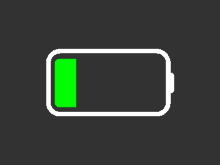

The Hawaii Natural Energy Institute examined 14 NMC-LCO 18650 batteries with a nominal capacity of 2.8 Ah, which were cycled over 1000 times at 25°C with a CC-CV charge rate of C/2 rate and discharge rate of 1.5C.

From that source dataset, I created features that showcase the voltage and current behaviour over each cycle. Those features can be used to predict the remaining useful life (RUL) of the batteries. The dataset contains the summary of the 14 batteries.

Variables:

 - Cycle Index: number of cycle
 - F1: Discharge Time (s)
 - F2: Time at 4.15V (s)
 - F3: Time Constant Current (s)
 - F4: Decrement 3.6-3.4V (s)
 - F5: Max. Voltage Discharge (V)
 - F6: Min. Voltage Charge (V)
 - F7: Charging Time (s)
 - Total time (s)
 - RUL: target

You may check on GitHub how the dataset was built: https://github.com/ignavinuales/Battery_RUL_Prediction

<a id='2'></a>
# <p style="padding: 8px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:100%"> <b>Explore</b>

In [2]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [4]:
!pip install seaborn

In [27]:
pip install pandas-profiling

  Using cached multimethod-1.5-py3-none-any.whl (7.7 kB)
  Using cached htmlmin-0.1.12.tar.gz (19 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached phik-0.12.0-cp36-cp36m-win_amd64.whl (660 kB)
  Using cached requests-2.27.1-py2.py3-none-any.whl (63 kB)
  Using cached pydantic-1.9.2-cp36-cp36m-win_amd64.whl (2.1 MB)
  Using cached tqdm-4.64.1-py2.py3-none-any.whl (78 kB)
Using legacy 'setup.py install' for htmlmin, since package 'wheel' is not installed.
  Attempting uninstall: decorator
    Found existing installation: decorator 5.1.1
    Uninstalling decorator-5.1.1:
      Successfully uninstalled decorator-5.1.1
    Running setup.py install for htmlmin: started
    Running setup.py install for htmlmin: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


In [38]:
pip install statsmodels 

Note: you may need to restart the kernel to use updated packages.


In [45]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import pandas as pd

from IPython.display import display, HTML
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio


import seaborn as sns
from importlib import reload
import matplotlib.pyplot as plt
import matplotlib
import warnings

# Configure Jupyter Notebook
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', 500) 
pd.set_option('display.expand_frame_repr', False)
display(HTML("<style>div.output_scroll { height: 35em; }</style>"))

reload(plt)
%matplotlib inline
%config InlineBackend.figure_format ='retina'

warnings.filterwarnings('ignore')


In [6]:
df = pd.read_csv('Battery_RUL.csv')

In [13]:
df.head()

,Unnamed: 0,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),Total time (s),RUL,Battery ID
0,0,1.0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,14648.45,1112,1
1,1,2.0,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,19124.28,1111,1
2,2,3.0,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,19029.51,1110,1
3,3,4.0,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,18923.65,1109,1
4,4,6.0,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,104171.80,1107,1


In [14]:
df.tail()

,Unnamed: 0,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),Total time (s),RUL,Battery ID
15059,1046,1108.0,770.44,179.523810,3.773,3.742,922.775,1412.38,6678.88,7464.13,4,14
15060,1047,1109.0,771.12,179.523810,3.773,3.744,915.512,1412.31,6670.38,7456.25,3,14
15061,1048,1110.0,769.12,179.357143,3.773,3.742,915.513,1412.31,6637.12,7421.00,2,14
15062,1049,1111.0,773.88,162.374667,3.763,3.839,539.375,1148.00,7660.62,51638.81,1,14
15063,1050,1112.0,677537.27,142740.640000,4.206,3.305,49680.004,599830.14,599830.14,677688.50,0,14


First up is just to eyeball the data.


In [15]:
df['Battery ID']= 0 
batteries=[] 
ID=1
for rul in df['RUL']: 
    batteries.append(ID) 
    if rul == 0: 
        ID+=1
        continue
df['Battery ID'] = batteries 

In [16]:
sensor_list = df.columns[1:-2]
sensor_list

Index(['Cycle_Index', 'Discharge Time (s)', 'Decrement 3.6-3.4V (s)',
       'Max. Voltage Dischar. (V)', 'Min. Voltage Charg. (V)',
       'Time at 4.15V (s)', 'Time constant current (s)', 'Charging time (s)',
       'Total time (s)'],
      dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15064 entries, 0 to 15063
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 15064 non-null  int64  
 1   Cycle_Index                15064 non-null  float64
 2   Discharge Time (s)         15064 non-null  float64
 3   Decrement 3.6-3.4V (s)     15064 non-null  float64
 4   Max. Voltage Dischar. (V)  15064 non-null  float64
 5   Min. Voltage Charg. (V)    15064 non-null  float64
 6   Time at 4.15V (s)          15064 non-null  float64
 7   Time constant current (s)  15064 non-null  float64
 8   Charging time (s)          15064 non-null  float64
 9   Total time (s)             15064 non-null  float64
 10  RUL                        15064 non-null  int64  
 11  Battery ID                 15064 non-null  int64  
dtypes: float64(9), int64(3)
memory usage: 1.4 MB


In [18]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,15064.0,537.524628,310.666732,0.000,268.750000,537.500000,806.2500,1080.000
Cycle_Index,15064.0,556.155005,322.378480,1.000,271.000000,560.000000,833.0000,1134.000
Discharge Time (s),15064.0,4581.273960,33144.012077,8.690,1169.310000,1557.250000,1908.0000,958320.370
Decrement 3.6-3.4V (s),15064.0,1239.784672,15039.589269,-397645.908,319.600000,439.239471,600.0000,406703.768
Max. Voltage Dischar. (V),15064.0,3.908176,0.091003,3.043,3.846000,3.906000,3.9720,4.363
Min. Voltage Charg. (V),15064.0,3.577904,0.123695,3.022,3.488000,3.574000,3.6630,4.379
Time at 4.15V (s),15064.0,3768.336171,9129.552477,-113.584,1828.884179,2930.203500,4088.3265,245101.117
Time constant current (s),15064.0,5461.266970,25155.845202,5.980,2564.310000,3824.260000,5012.3500,880728.100
Charging time (s),15064.0,10066.496204,26415.354121,5.980,7841.922500,8320.415000,8763.2825,880728.100
Total time (s),15064.0,14657.191773,34710.735892,31.690,9035.022500,9946.195000,10786.5425,958471.430


In [21]:
train_battery_ids = []
test_battery_ids = []
battery_ids = df['Battery ID'].unique()

for i in battery_ids:
    if i<9:
        train_battery_ids.append(i)
    else:
        test_battery_ids.append(i)
df_train = df[df['Battery ID'].isin(train_battery_ids)]
df_test = df[df['Battery ID'].isin(test_battery_ids)]

We find the RUL for the components at each cycle

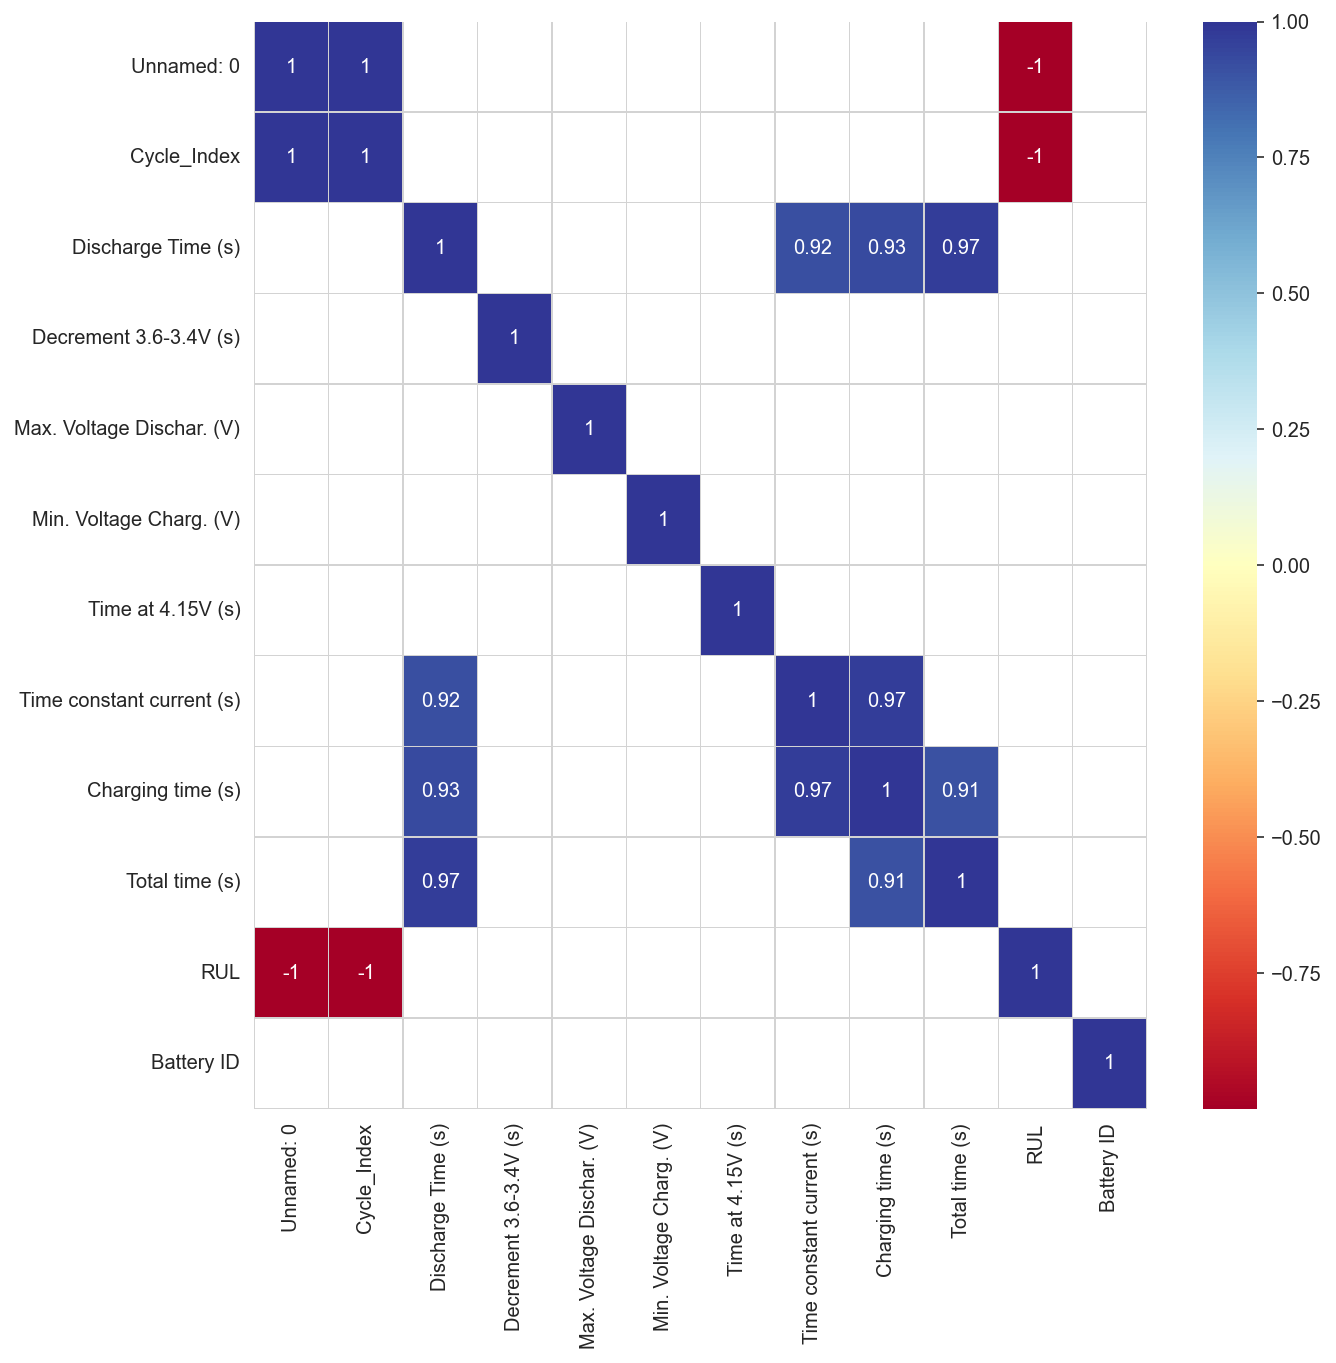

In [22]:
plt.figure(figsize=(10,10))
threshold = 0.90
sns.set_style("whitegrid", {"axes.facecolor": ".0"})
df_cluster2 = df_train.corr()
mask = df_cluster2.where((abs(df_cluster2) >= threshold)).isna()
plot_kws={"s": 1}
sns.heatmap(df_cluster2,
            cmap='RdYlBu',
            annot=True,
            mask=mask,
            linewidths=0.2, 
            linecolor='lightgrey').set_facecolor('white')

In [28]:
from pandas_profiling import ProfileReport

The profiling report follows to look for outliers, missing values, and distributions. 

In [29]:
# %%time
# profile = ProfileReport(df_train,
#                         title="Predictive Maintenance",
#                         dataset={"description": "This profiling report was generated for Carl Kirstein",
#                                  "copyright_holder": "Carl Kirstein",
#                                  "copyright_year": "2022",
#                                 },
#                         explorative=True,
#                        )
# profile

sensors with constant values can be dropped as they have no predictive power

In [30]:
sens_const_values = []
for feature in list(sensor_list):
    try:
        if df_train[feature].min()==df_train[feature].max():
            sens_const_values.append(feature)
    except:
        pass

print(sens_const_values)
df_train.drop(sens_const_values,axis=1,inplace=True)
df_test.drop(sens_const_values,axis=1,inplace=True)

[]


Drop one of the highly correlated features and keep the other. The threshold for correlation is set at 0.95

In [31]:
# corr_features = ['sensor_9']

cor_matrix = df_train[sensor_list].corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
corr_features = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(corr_features)
df_train.drop(corr_features,axis=1,inplace=True)
df_test.drop(corr_features,axis=1,inplace=True)

['Charging time (s)', 'Total time (s)']


The remaining features

In [32]:
list(df_train)

['Unnamed: 0',
 'Cycle_Index',
 'Discharge Time (s)',
 'Decrement 3.6-3.4V (s)',
 'Max. Voltage Dischar. (V)',
 'Min. Voltage Charg. (V)',
 'Time at 4.15V (s)',
 'Time constant current (s)',
 'RUL',
 'Battery ID']

In [33]:
df_train.head()

,Unnamed: 0,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),RUL,Battery ID
0,0,1.0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,1112,1
1,1,2.0,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,1111,1
2,2,3.0,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,1110,1
3,3,4.0,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,1109,1
4,4,6.0,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,1107,1


In [34]:
features = list(df_train.columns)

In [35]:
for feature in features:
    print(feature + " - " + str(len(df_train[df_train[feature].isna()])))

Unnamed: 0 - 0
Cycle_Index - 0
Discharge Time (s) - 0
Decrement 3.6-3.4V (s) - 0
Max. Voltage Dischar. (V) - 0
Min. Voltage Charg. (V) - 0
Time at 4.15V (s) - 0
Time constant current (s) - 0
RUL - 0
Battery ID - 0


The charts below shows what the data looks like. It is a bit noisy between charging and discharging, but it turns out that this information is important, i.e. you will not get better results by smoothing out the data.

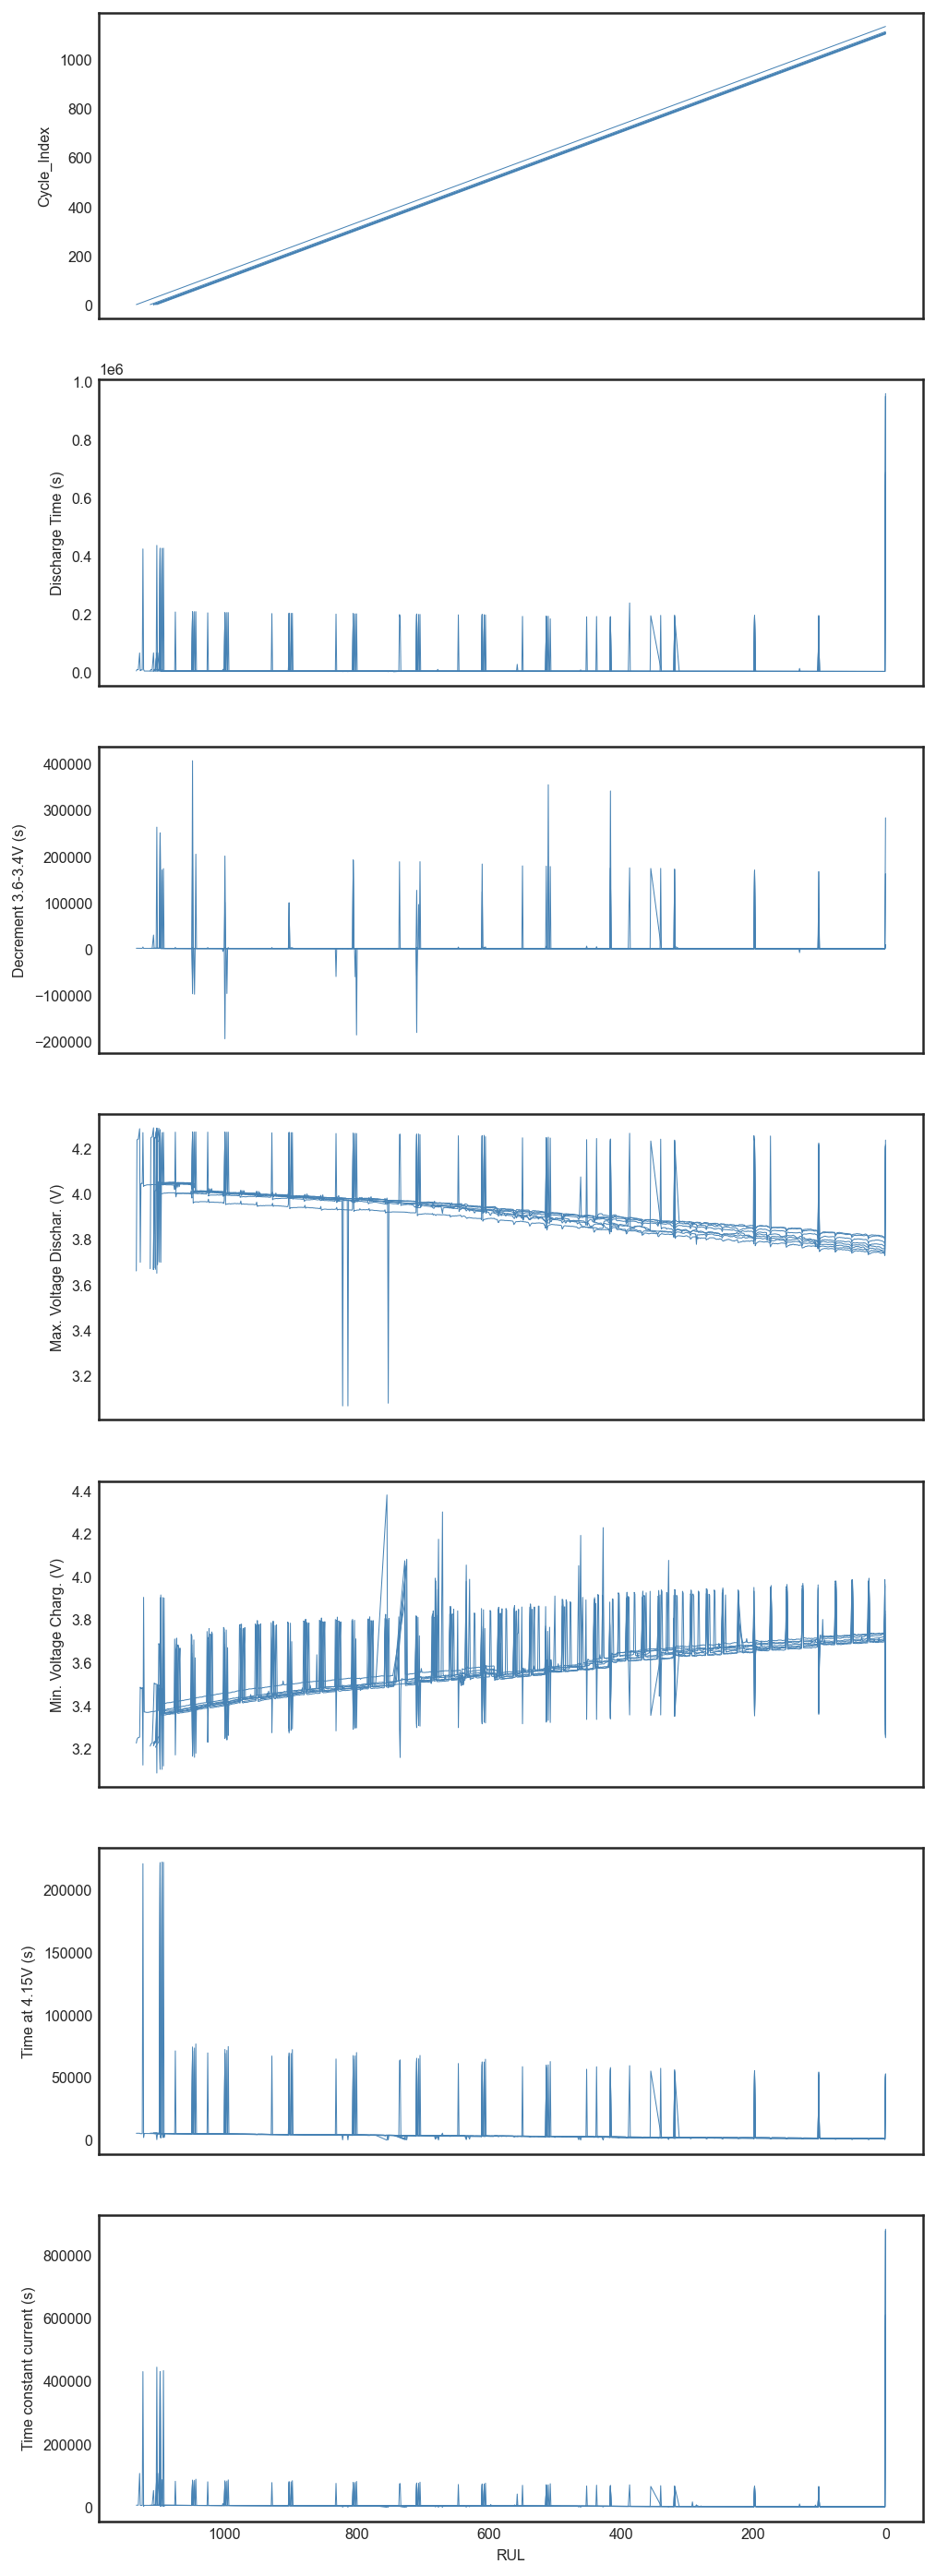

In [36]:
plt.style.use('seaborn-white') 
plt.rcParams['figure.figsize']=8,25 
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 8
plt.rcParams['lines.linewidth'] = 0.5
plot_items = list(df_train.columns)[1:-2]
fig,ax = plt.subplots(len(plot_items),sharex=True)
ax[0].invert_xaxis()

batteries = list(df_train['Battery ID'].unique())
batteries_test = list(df_test['Battery ID'].unique())

for battery in batteries:
    for i,item in enumerate(plot_items):
        f = sns.lineplot(data=df_train[df_train['Battery ID']==battery],x='RUL',y=item,color='steelblue',ax=ax[i],
                        )

<a id='3'></a>
# <p style="padding: 8px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:100%"> <b>Pre-processing and Feature Selection</b>

Perform a statistical univariate test to determine the best features.

In [39]:
# awesome bit of code from https://www.kaggle.com/code/adibouayjan/house-price-step-by-step-modeling

Selected_Features = []
import statsmodels.api as sm

def backward_regression(X, y, initial_list=[], threshold_out=0.05, verbose=True):
    """To select feature with Backward Stepwise Regression 

    Args:
        X -- features values
        y -- target variable
        initial_list -- features header
        threshold_out -- pvalue threshold of features to drop
        verbose -- true to produce lots of logging output

    Returns:
        list of selected features for modeling 
    """
    included = list(X.columns)
    while True:
        changed = False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()  # null if pvalues is empty
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f"worst_feature : {worst_feature}, {worst_pval} ")
        if not changed:
            break
    Selected_Features.append(included)
    print(f"\nSelected Features:\n{Selected_Features[0]}")


# Application of the backward regression function on our training data
X = df_train.iloc[:,1:-2]
y = df_train.iloc[:,-1]
backward_regression(X, y)

worst_feature : Time at 4.15V (s), 0.9112265699457665 
worst_feature : Time constant current (s), 0.2821351925318008 
worst_feature : Min. Voltage Charg. (V), 0.23290594261325667 
worst_feature : Decrement 3.6-3.4V (s), 0.15552182871270884 

Selected Features:
['Cycle_Index', 'Discharge Time (s)', 'Max. Voltage Dischar. (V)']


There are only two features required to predict the RUL. Quite interesting. 

In [40]:
feature_names = Selected_Features[0]

<a id='4'></a>
# <p style="padding: 8px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:100%"> <b>Modelling and Evaluation</b>

In [46]:
import time
model_performance = pd.DataFrame(columns=['r-Squared','RMSE','total time'])

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer, accuracy_score

import sklearn
from sklearn.metrics import mean_squared_error, r2_score

model_performance = pd.DataFrame(columns=['R2','RMSE', 'time to train','time to predict','total time'])


def R_squared(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - SS_res/(SS_tot + K.epsilon())

In [47]:
X_train = df_train[feature_names]
y_train = df_train['RUL']

X_test = df_test[feature_names]
y_test = df_test['RUL']


In [48]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
sc = MinMaxScaler()
# sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [49]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

<a id='4_1'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#aaaaaa; border-radius:5px; font-size:100%"> <b>kNN</b>

In [50]:
%%time
from sklearn.neighbors import KNeighborsRegressor
start = time.time()
model = KNeighborsRegressor(n_neighbors=3).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()



model_performance.loc['kNN'] = [model.score(X_test,y_test), 
                                   mean_squared_error(y_test,y_predictions,squared=False),
                                   end_train-start,
                                   end_predict-end_train,
                                   end_predict-start]

print('R-squared error: '+ "{:.2%}".format(model.score(X_test,y_test)))
print('Root Mean Squared Error: '+ "{:.2f}".format(mean_squared_error(y_test,y_predictions,squared=False)))

R-squared error: 99.61%
Root Mean Squared Error: 19.99
Wall time: 142 ms


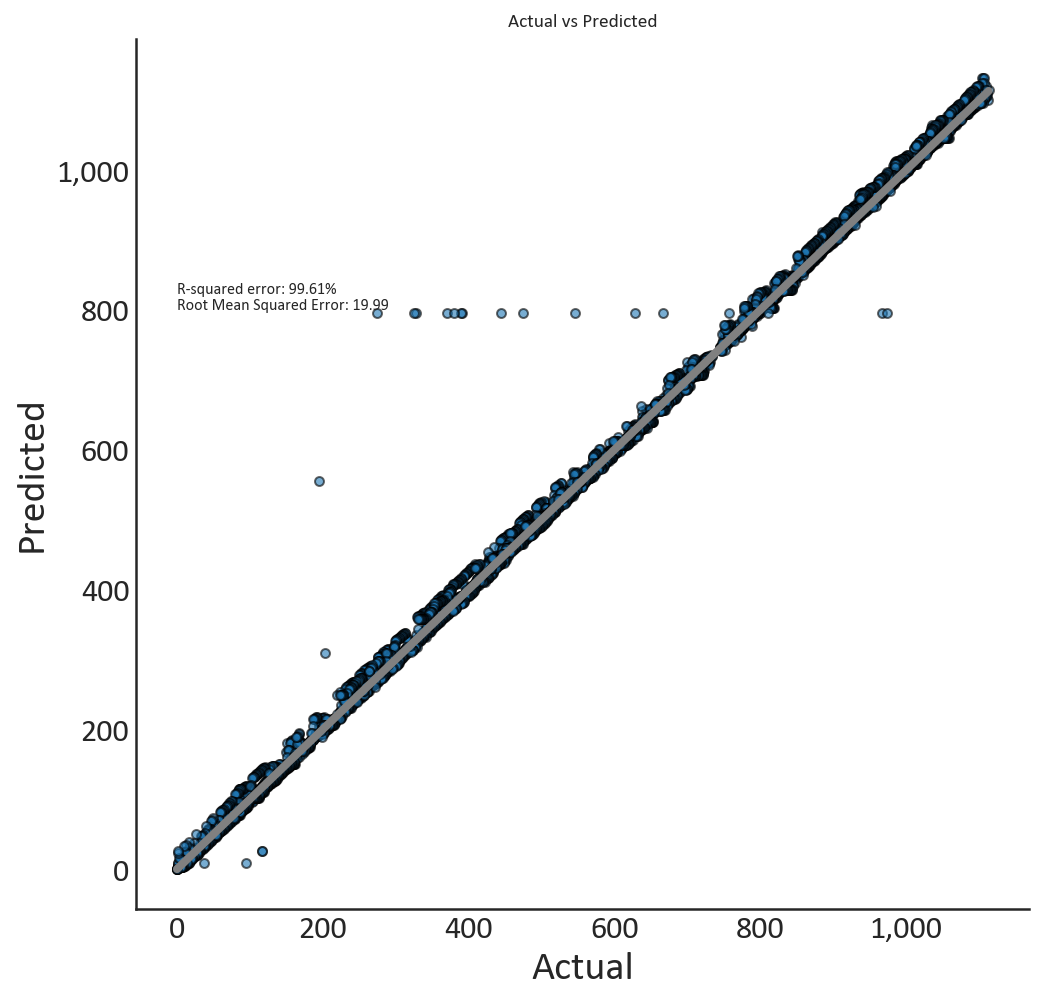

In [56]:
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize']=8,8 
plt.rcParams['font.family'] = 'Calibri'
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['axes.labelsize']=20
plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16
plt.rcParams['legend.fontsize']=16

fig,ax = plt.subplots()
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
g = sns.scatterplot(x=y_test,
                y=y_predictions,
                s=20,
                alpha=0.6,
                linewidth=1,
                edgecolor='black',
                ax=ax)
f = sns.lineplot(x=[min(y_test),max(y_test)],
             y=[min(y_test),max(y_test)],
             linewidth=4,
             color='gray',
             ax=ax)

plt.annotate(text=('R-squared error: '+ "{:.2%}".format(model.score(X_test,y_test)) +'\n' +
                  'Root Mean Squared Error: '+ "{:.2f}".format(mean_squared_error(y_test,y_predictions,squared=False))),
             xy=(0,800),
             size='medium')

xlabels = ['{:,.0f}'.format(x) for x in g.get_xticks()]
g.set_xticklabels(xlabels)
ylabels = ['{:,.0f}'.format(x) for x in g.get_yticks()]
g.set_yticklabels(ylabels)
sns.despine()

<a id='4_2'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#aaaaaa; border-radius:5px; font-size:100%"> <b>SVM</b>

In [57]:
%%time
from sklearn.svm import SVR
start = time.time()
model = SVR(kernel="rbf", C=10000, gamma=0.5, epsilon=0.001).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

model_performance.loc['SVM'] = [model.score(X_test,y_test), 
                                   mean_squared_error(y_test,y_predictions,squared=False),
                                   end_train-start,
                                   end_predict-end_train,
                                   end_predict-start]

print('R-squared error: '+ "{:.2%}".format(model.score(X_test,y_test)))
print('Root Mean Squared Error: '+ "{:.2f}".format(mean_squared_error(y_test,y_predictions,squared=False)))

R-squared error: 99.99%
Root Mean Squared Error: 3.17
Wall time: 2min 19s


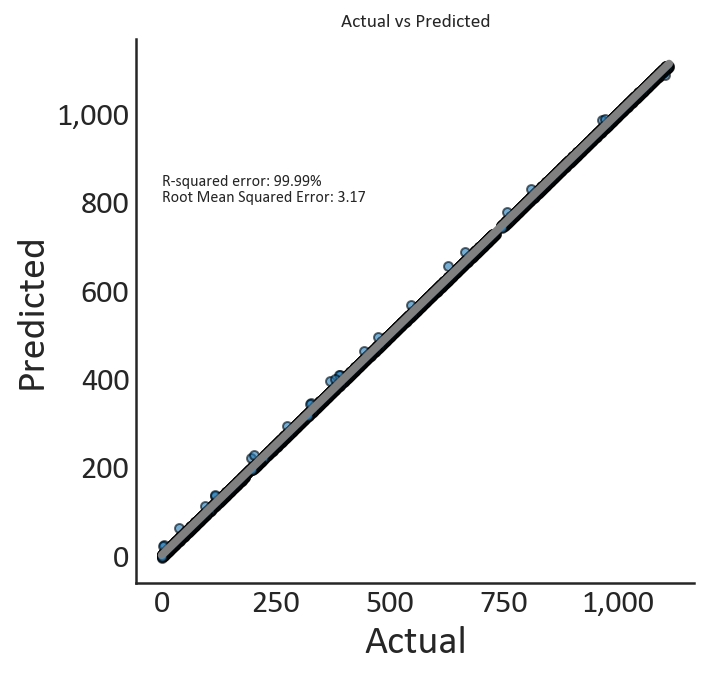

In [61]:
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize']=5,5 
plt.rcParams['font.family'] = 'Calibri'
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['axes.labelsize']=20
plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16
plt.rcParams['legend.fontsize']=16

fig,ax = plt.subplots()
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
g = sns.scatterplot(x=y_test,
                y=y_predictions,
                s=20,
                alpha=0.6,
                linewidth=1,
                edgecolor='black',
                ax=ax)
f = sns.lineplot(x=[min(y_test),max(y_test)],
             y=[min(y_test),max(y_test)],
             linewidth=4,
             color='gray',
             ax=ax)

plt.annotate(text=('R-squared error: '+ "{:.2%}".format(model.score(X_test,y_test)) +'\n' +
                  'Root Mean Squared Error: '+ "{:.2f}".format(mean_squared_error(y_test,y_predictions,squared=False))),
             xy=(0,800),
             size='medium')

xlabels = ['{:,.0f}'.format(x) for x in g.get_xticks()]
g.set_xticklabels(xlabels)
ylabels = ['{:,.0f}'.format(x) for x in g.get_yticks()]
g.set_yticklabels(ylabels)
sns.despine()

<a id='4_3'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#aaaaaa; border-radius:5px; font-size:100%"> <b>Random Forest</b>

In [62]:
%%time
from sklearn.ensemble import RandomForestRegressor
start = time.time()
model = RandomForestRegressor(n_jobs=-1,
                              n_estimators=100,
                              min_samples_leaf=1,
                              max_features='sqrt',
                              # min_samples_split=2,
                              bootstrap = True,
                              criterion='mse',
                             ).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

model_performance.loc['Random Forest'] = [model.score(X_test,y_test), 
                                   mean_squared_error(y_test,y_predictions,squared=False),
                                   end_train-start,
                                   end_predict-end_train,
                                   end_predict-start]

print('R-squared error: '+ "{:.2%}".format(model.score(X_test,y_test)))
print('Root Mean Squared Error: '+ "{:.2f}".format(mean_squared_error(y_test,y_predictions,squared=False)))

R-squared error: 99.72%
Root Mean Squared Error: 16.95
Wall time: 717 ms


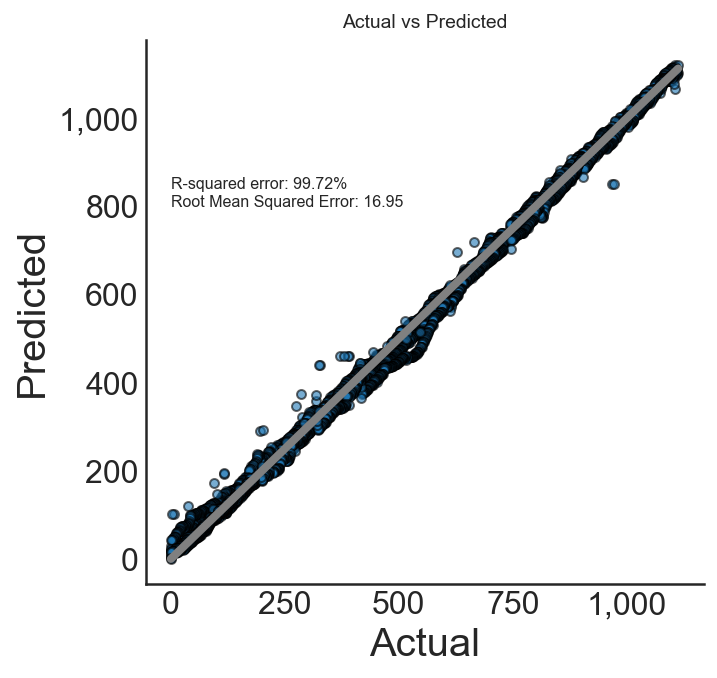

In [63]:
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize']=5,5 

fig,ax = plt.subplots()
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
g = sns.scatterplot(x=y_test,
                y=y_predictions,
                s=20,
                alpha=0.6,
                linewidth=1,
                edgecolor='black',
                ax=ax)
f = sns.lineplot(x=[min(y_test),max(y_test)],
             y=[min(y_test),max(y_test)],
             linewidth=4,
             color='gray',
             ax=ax)

plt.annotate(text=('R-squared error: '+ "{:.2%}".format(model.score(X_test,y_test)) +'\n' +
                  'Root Mean Squared Error: '+ "{:.2f}".format(mean_squared_error(y_test,y_predictions,squared=False))),
             xy=(0,800),
             size='medium')

xlabels = ['{:,.0f}'.format(x) for x in g.get_xticks()]
g.set_xticklabels(xlabels)
ylabels = ['{:,.0f}'.format(x) for x in g.get_yticks()]
g.set_yticklabels(ylabels)
sns.despine()

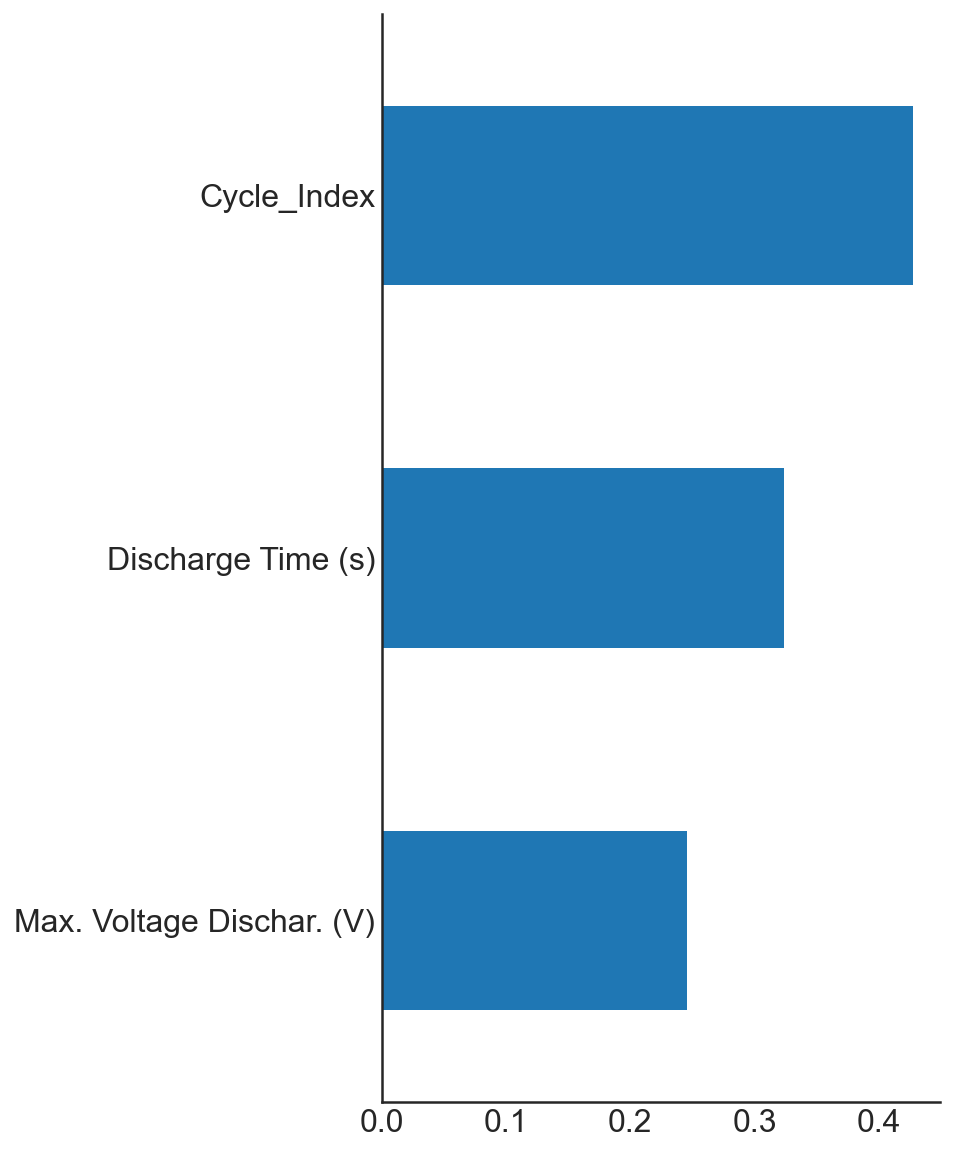

In [64]:
plt.rcParams['figure.figsize']=5,10
sns.set_style("white")
feat_importances = pd.Series(model.feature_importances_, index=feature_names)
feat_importances = feat_importances.groupby(level=0).mean()
feat_importances.nlargest(20).plot(kind='barh').invert_yaxis()
sns.despine()
plt.show()

In [65]:
df_test.head()

,Unnamed: 0,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),RUL,Battery ID
8629,0,1.0,2565.31,1186.4965,3.664,3.221,5439.007,6740.99,1107,9
8630,1,2.0,7333.44,1196.9920,4.240,3.227,5480.992,6740.99,1106,9
8631,2,3.0,7302.50,1133.9840,4.242,3.232,5460.000,6720.00,1105,9
8632,3,4.0,7300.03,1099.0080,4.244,3.234,5467.004,6720.00,1104,9
8633,4,6.0,64835.52,1116.4960,4.288,3.239,5467.008,107695.78,1102,9


In [66]:
df_test['RUL predicted'] = y_predictions

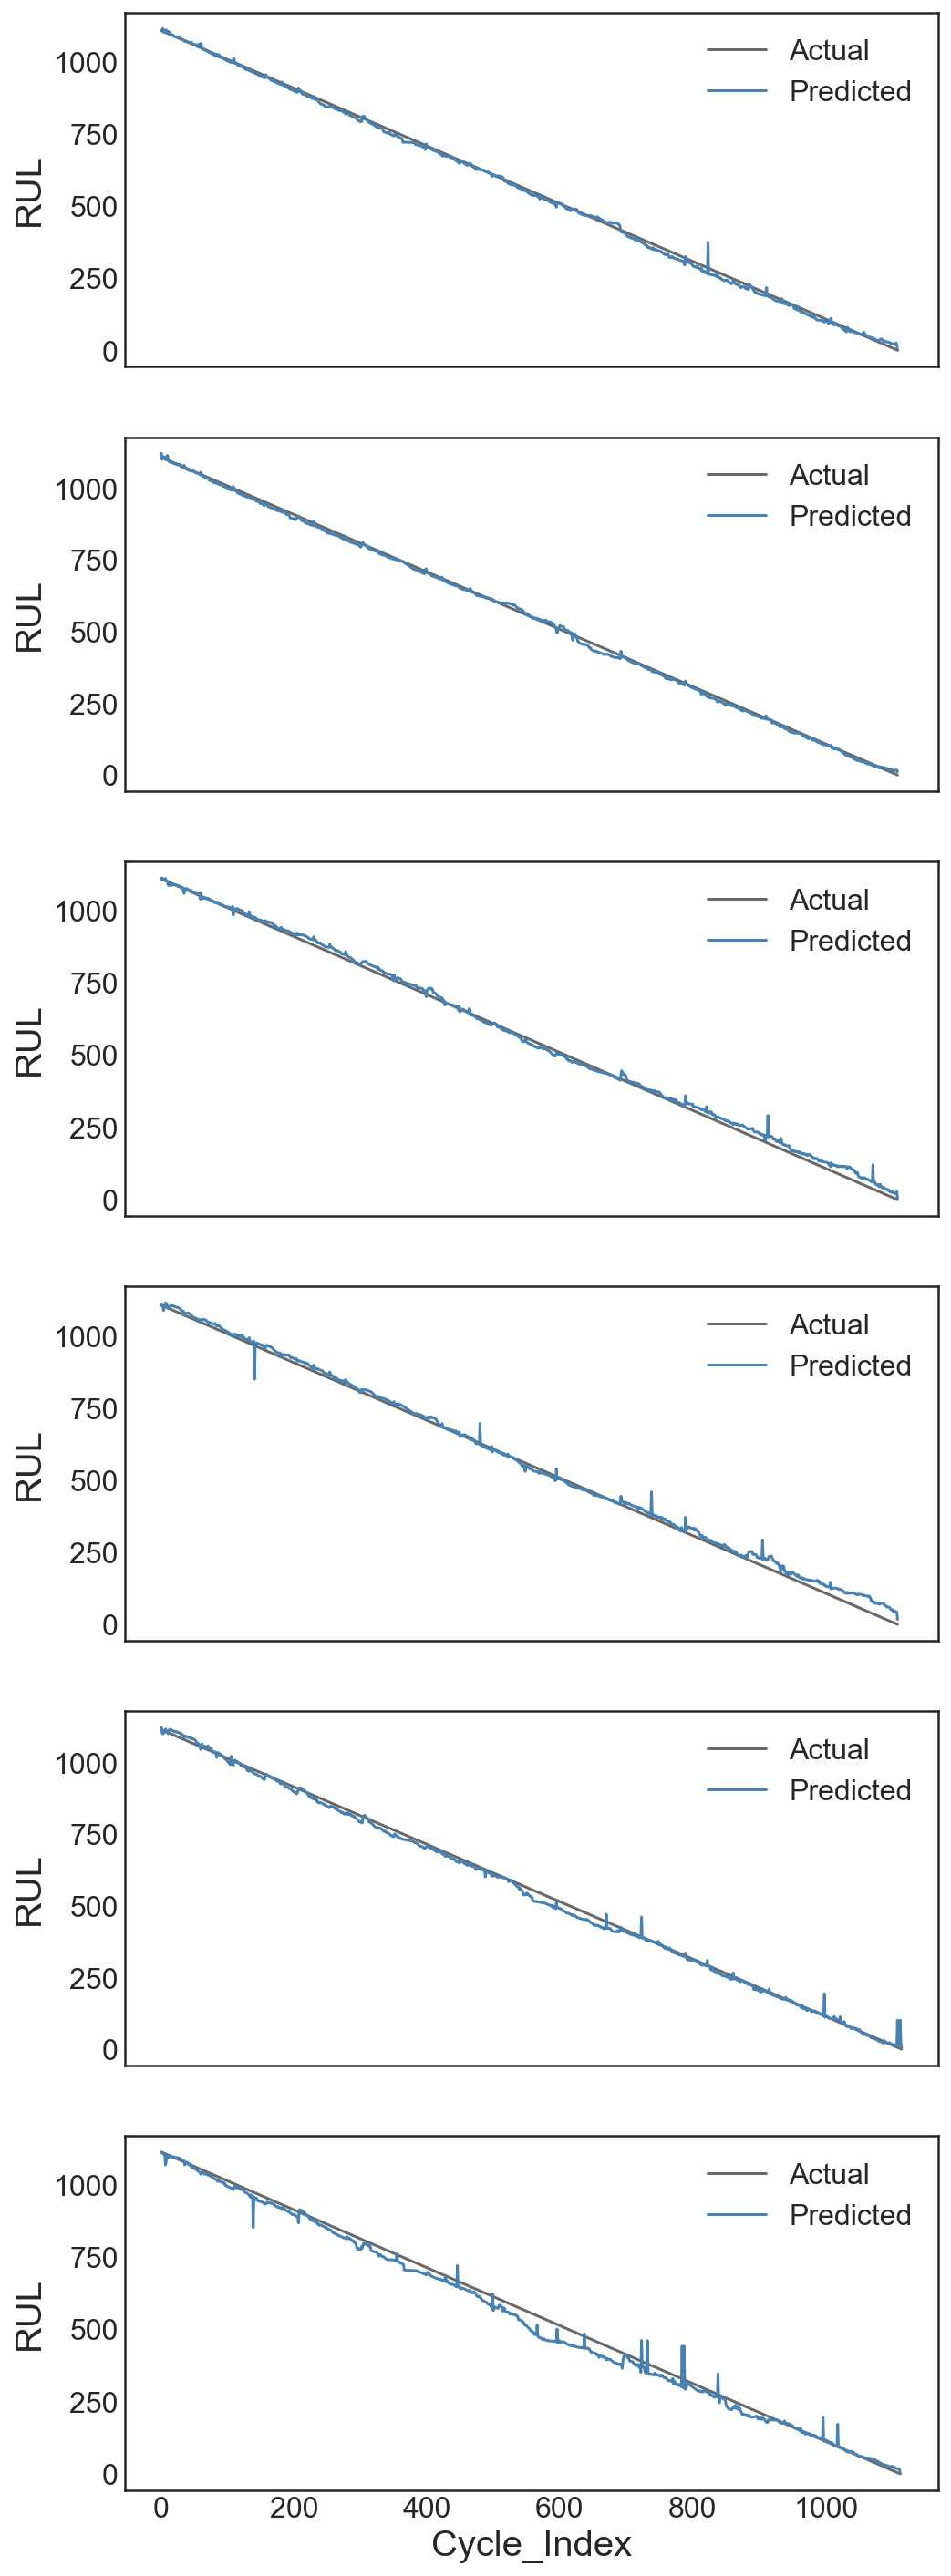

In [67]:
batteries = list(df_train['Battery ID'].unique())
batteries_test = list(df_test['Battery ID'].unique())

plt.style.use('seaborn-white') 
plt.rcParams['figure.figsize']=8,25 
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 8
plt.rcParams['lines.linewidth'] = 1.5
fig,ax = plt.subplots(len(batteries_test),sharex=True)

for i, battery in enumerate(batteries_test):
    f = sns.lineplot(data=df_test[df_test['Battery ID']==battery],
                     x='Cycle_Index',
                     y='RUL',
                     color='dimgray',
                     ax=ax[i],
                     label='Actual'
                    )
    g = sns.lineplot(data=df_test[df_test['Battery ID']==battery],
                     x='Cycle_Index',
                     y='RUL predicted',
                     color='steelblue',
                     ax=ax[i],
                     label='Predicted'
                    )
    ax[i].legend = True

<a id='5'></a>
# <p style="padding: 8px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:100%"> <b>Evaluate</b>

In [68]:
model_performance.style.background_gradient(cmap='RdYlBu_r').format({'R2': '{:.2%}',
                                                                     'RMSE': '{:.2f}',
                                                                     'time to train':'{:.3f}',
                                                                     'time to predict':'{:.3f}',
                                                                     'total time':'{:.3f}',
                                                                     })

,R2,RMSE,time to train,time to predict,total time
kNN,99.61%,19.99,0.022,0.022,0.044
SVM,99.99%,3.17,125.259,4.729,129.987
Random Forest,99.72%,16.95,0.364,0.111,0.476


<a id='6'></a>
# <p style="padding: 8px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:100%"> <b>Conclusion</b>

Support Vector Machines does the best job of the RUL(remaining useful life) prediction throughout the life of the battery. 